# Applied Statistics (ECS764P): Lab 2

We will include all the required libratries in the below cell

In [1]:
import numpy as np
from scipy.stats import norm, uniform
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import beta
from scipy.integrate import quad

### Question 1:

(Visualisation, 1.5 mark) Using scipy.stats’s rvs method, sample 30 tuples (xi,xi^2,xi^3,xi^4) 1≤i≤30 s.th.

xi ∼Normal(0, 1)
xi^2 ∼ Normal(2, 4)
xi^3 ∼ Uniform(0, 1)
xi^4 = xi^3.z where z ∼ Uniform(0, 1)

Using one of the visualisation techniques discussed in the lectures, plot this 4-D data. (Hint: you may find that you need to adjust some parameter(s) for your plot to be legible; if so please do it.). The four dimensions are not all independent of one another. How does this manifest itself on your plot?

We will first create the 30 tuples we need to plot the 4-D data.

In [2]:
# Set the random seed for reproducibility
np.random.seed(0)

# Sample data for xi from Normal(0, 1)
xi = norm.rvs(loc=0, scale=1, size=30)

# Sample data for xi^2 from Normal(2, 4)
xi_squared = norm.rvs(loc=2, scale=2, size=30)

# Sample data for xi^3 from Uniform(0, 1)
xi_cubed = uniform.rvs(loc=0, scale=1, size=30)

# Sample data for z from Uniform(0, 1)
z = uniform.rvs(loc=0, scale=1, size=30)

# Calculate xi^4 = xi^3 * z
xi_to_the_fourth = xi_cubed * z

# Create a list of tuples (xi, xi^2, xi^3, xi^4)
data_tuples = list(zip(xi, xi_squared, xi_cubed, xi_to_the_fourth))

# Print the first few tuples to verify the data
for i in range(5):
    print(data_tuples[i])


(1.764052345967664, 2.3098948513938327, 0.29614019752214493, 0.06606343875375528)
(0.4001572083672233, 2.7563250392043472, 0.11872771895424405, 0.11311771687332242)
(0.9787379841057392, 0.2244285047397745, 0.317983179393976, 0.14217834948056846)
(2.240893199201458, -1.961592936447854, 0.41426299451466997, 0.3506357912410759)
(1.8675579901499675, 1.304175701347695, 0.06414749634878436, 0.04486984425947994)


We have just taken out 5 tuples from the 30 created tuples. Now we can plot the 4-D data. Here we will be using a bubble plot to plot our 4-D data.

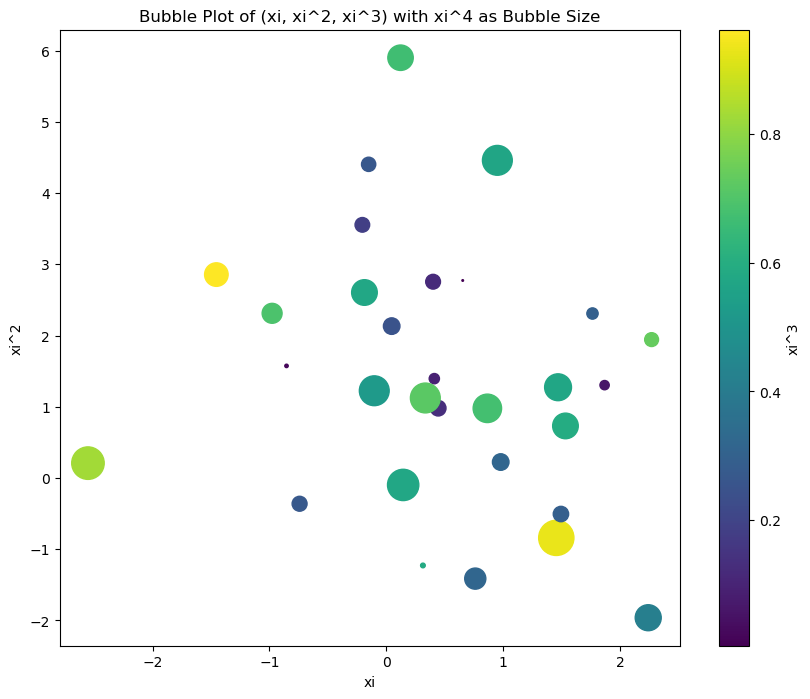

In [3]:
# Create a bubble plot
plt.figure(figsize=(10, 8))
plt.scatter(xi, xi_squared, c=xi_cubed, s=xi_to_the_fourth * 1000, cmap='viridis')
plt.xlabel('xi')
plt.ylabel('xi^2')
plt.title('Bubble Plot of (xi, xi^2, xi^3) with xi^4 as Bubble Size')
plt.colorbar(label='xi^3')
plt.show()


In the above bubble plot, we have xi as the x-axis, xi^2 as y-axis, xi^3 as the color bar and xi^4 as the diameter of the bubbles.

### Question 2:

(Visualisation, 1.5 mark) Display a QQ plot for the following probability measures: the standard normal Normal(0, 1) on the x-axis and the standard Cauchy distribution Cauchy(0, 1) on the y-axis. What does the QQ plot tell us about the tails of these distributions?

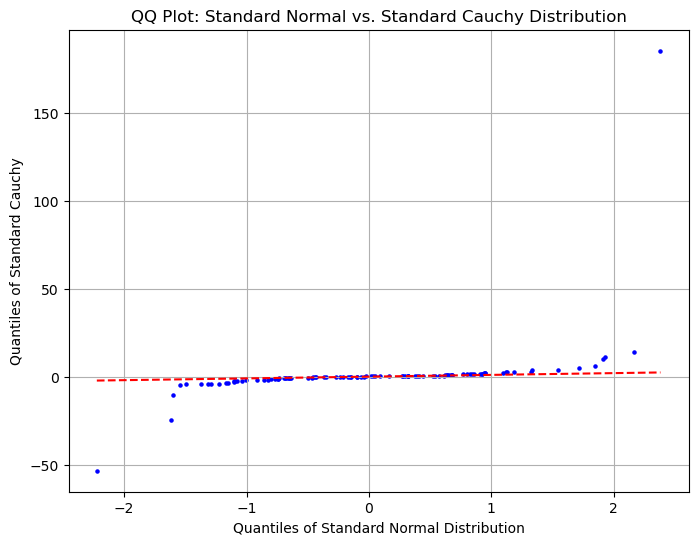

In [4]:
# Generate a random sample from the standard normal distribution
sample_size = 100
data_normal = np.random.normal(0, 1, sample_size)

# Generate a random sample from the standard Cauchy distribution
data_cauchy = np.random.standard_cauchy(sample_size)

# Sort the data to prepare for quantile calculations
data_normal.sort()
data_cauchy.sort()

# Calculate the quantiles for the two datasets
quantiles_normal = np.percentile(data_normal, np.linspace(0, 100, sample_size))
quantiles_cauchy = np.percentile(data_cauchy, np.linspace(0, 100, sample_size))

# Create the QQ plot
plt.figure(figsize=(8, 6))
plt.scatter(quantiles_normal, quantiles_cauchy, color='b', s=5)
plt.xlabel('Quantiles of Standard Normal Distribution')
plt.ylabel('Quantiles of Standard Cauchy')
plt.title('QQ Plot: Standard Normal vs. Standard Cauchy Distribution')
plt.plot([min(quantiles_normal), max(quantiles_normal)], [min(quantiles_normal), max(quantiles_normal)], color='red', linestyle='--')
plt.grid(True)
plt.show()


Here, we first calculated the quantiles of the Normal Distibution and quantiles of Cauchy Distribution by sorting the collected random samples.

### Question 3:

(Independent sum of two probability measures, 3 marks) Recall from the lectures that if we have two probability measures P1 and P2 with respective densities f1 and f2, then the density of the sum P1 + P2 is given by the convolution of the two densities, viz. 
f(t)= integration[- infty , infty] f1(x) f2(t-x)dx.

In this question we consider the sum of Beta (2, 8) + Beta (8, 2). What is the support of Beta (8, 2)? What
is the support of Beta (8, 2)? Therefore, what is the support of Beta (2, 8) + Beta (8, 2)?

Write a function which implements the integrand of the integral above, that is to say that implements 
f1(x)f2(t−x), 
where f1 is the density of Beta (2, 8) and f2 is the density of Beta (8, 2). (Hint: this function will need two arguments.)

Next, generate 100 points (t1, . . . , t100) along the support of Beta (2, 8) + Beta (8, 2) (using numpy’s linspace function), and using a for loop, compute the pdf f1+2(ti) at these 100 points using quad. (Hint: the documentation of quad has an example showing how to integrate a function with two arguments along its first argument.) Plot your result.

Finally, generate 10000 samples from Beta (2, 8), 10000 samples from Beta (8, 2), add them, and plot the histogram of these sums along with the pdf computed in the previous step. What do you observe?

In first case scenario, we need to find the support of a Beta Distribution i.e. Beta(2,8). We can do that by calculating the Probability Density Function (PDF) of a Beta Distribution.

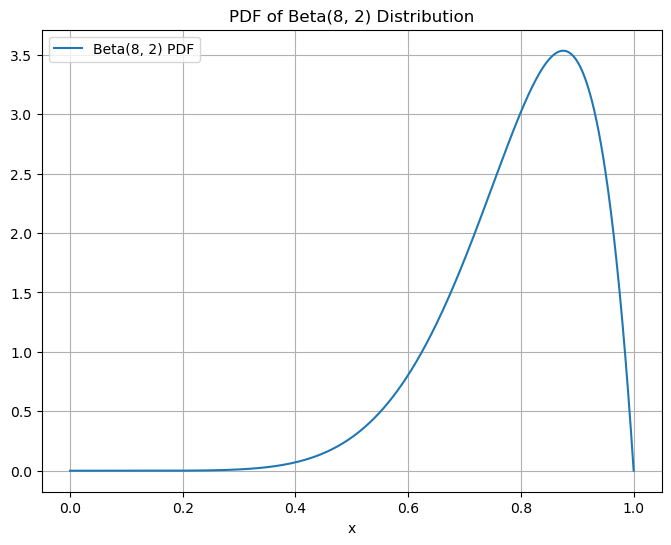

In [5]:
# Parameters of the Beta(8, 2) distribution
alpha_param = 8
beta_param = 2

# Create an array of values
x = np.linspace(0, 1, 1000)

# Calculate the PDF of Beta(8, 2)
pdf = beta.pdf(x, alpha_param, beta_param)

# Plot the PDF
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label='Beta(8, 2) PDF')
plt.xlabel('x')
plt.title('PDF of Beta(8, 2) Distribution')
plt.grid(True)
plt.legend()
plt.show()


In the above plot, we can clearly see that the support of the Beta Distribution is [0,1]

For the second task we need to find the support of a Beta Distribution i.e. Beta(2,8). Again we can do that by calculating the Probability Density Function (PDF) of a Beta Distribution.

### BUT

We all know that whatever the value for alpha parameter and beta parameter is, the support of any Beta Distribution will never change. Hence the support for Beta(8,2) = [0,1]

For the third task we need to find the support for Beta(2,8) + Beta(8,2). For this we can again plot the combined plot for Probability Density Function (PDF) of sum of bith Beta Distributions.

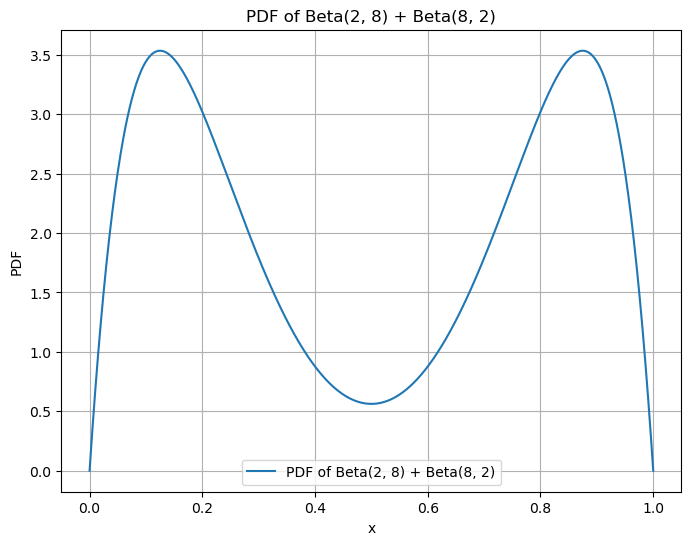

In [6]:
# Define the parameters for Beta(2, 8) and Beta(8, 2)
alpha1, beta1 = 2, 8
alpha2, beta2 = 8, 2

# Create a range of values for the x-axis
x = np.linspace(0, 1, 1000)

# Calculate the PDF of Beta(2, 8) and Beta(8, 2)
pdf1 = beta.pdf(x, alpha1, beta1)
pdf2 = beta.pdf(x, alpha2, beta2)

# Calculate the convolution of the two PDFs to obtain the PDF of their sum
pdf_sum = pdf1 + pdf2

# Plot the PDF of the sum
plt.figure(figsize=(8, 6))
plt.plot(x, pdf_sum, label='PDF of Beta(2, 8) + Beta(8, 2)')
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend()
plt.title('PDF of Beta(2, 8) + Beta(8, 2)')
plt.grid(True)
plt.show()


Hence, we conclude that even though the sum of two Beta Distribution is not a Beta Distribution but it's support is still [0,1]

For the next part, we need to write a function which will be calculating the integrand of the integral given above which will intrun implement f1(x)f2(t−x), where f1 is the density of Beta (2, 8) and f2 is the density of Beta (8, 2).

In [7]:
def integrand(x, t):
    # Define the PDFs of Beta(2, 8) and Beta(8, 2)
    pdf1 = beta.pdf(x, 2, 8)
    pdf2 = beta.pdf(t - x, 8, 2)
    
    # Calculate the product of the PDFs
    result = pdf1 * pdf2
    return result

# Example usage:
x_value = 0.5  # Replace with the desired value of x
t_value = 0.8  # Replace with the desired value of t
result = integrand(x_value, t_value)
print(f"The integrand at x={x_value} and t={t_value} is: {result}")


The integrand at x=0.5 and t=0.8 is: 0.0031000725000000003


We have added an exaple to check whether the integrand is correct or not.

For the next part, we need to generate 100 points (t1, . . . , t100) along the support of Beta (2, 8) + Beta (8, 2) and then compute the pdf f1+2(ti) at these 100 points using quad and then plot the result.

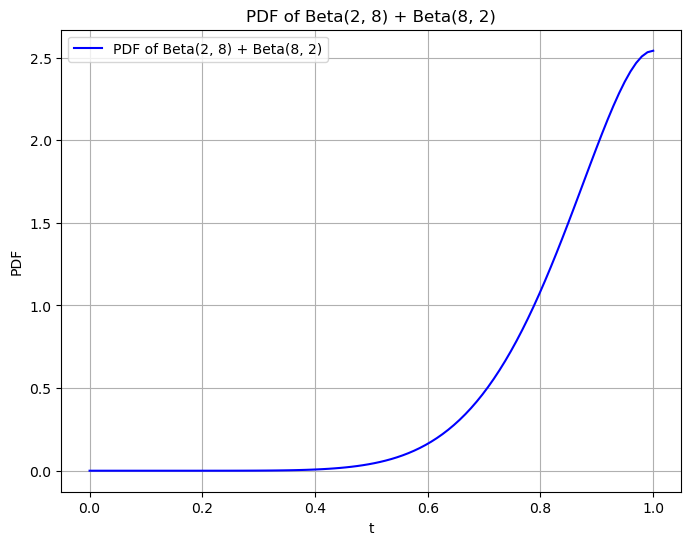

In [8]:
# Define the parameters for Beta(2, 8) and Beta(8, 2)
alpha1, beta1 = 2, 8
alpha2, beta2 = 8, 2

# Generate 100 points along the support of [0, 1]
points = np.linspace(0, 1, 100)

# Initialize an empty list to store the PDF values
pdf_values = []

# Define the integrand function for the convolution of Beta(2, 8) and Beta(8, 2)
def integrand(x, t):
    return beta.pdf(x, alpha1, beta1) * beta.pdf(t - x, alpha2, beta2)

# Use a for loop to compute the PDF at each point using quad
for t in points:
    result, _ = quad(integrand, 0, 1, args=(t,))
    pdf_values.append(result)

# Plot the PDF
plt.figure(figsize=(8, 6))
plt.plot(points, pdf_values, label='PDF of Beta(2, 8) + Beta(8, 2)', color='blue')
plt.xlabel('t')
plt.ylabel('PDF')
plt.title('PDF of Beta(2, 8) + Beta(8, 2)')
plt.legend()
plt.grid(True)
plt.show()


For the next part, we need to generate 10000 samples from Beta (2, 8), 10000 samples from Beta (8, 2), add them, and plot the
histogram of these sums along with the pdf computed in the previous step. 

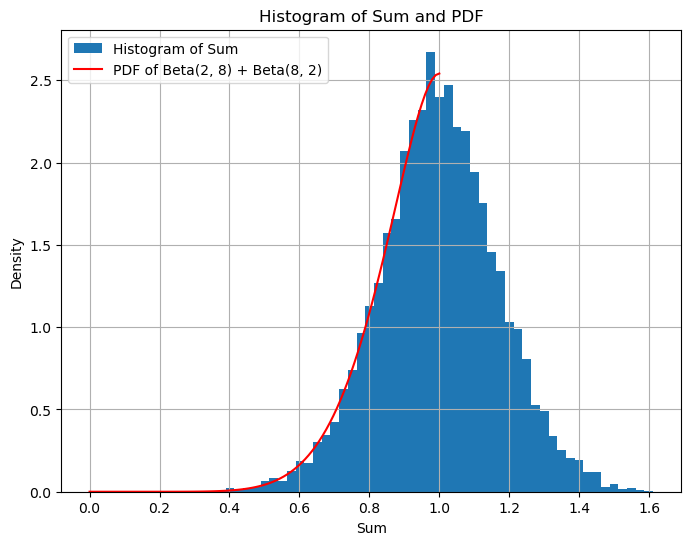

In [9]:
# Define the parameters for Beta(2, 8) and Beta(8, 2)
alpha1, beta1 = 2, 8
alpha2, beta2 = 8, 2

# Generate 10,000 samples from Beta(2, 8) and Beta(8, 2)
samples1 = beta.rvs(alpha1, beta1, size=10000)
samples2 = beta.rvs(alpha2, beta2, size=10000)

# Add the samples
sum_samples = samples1 + samples2

# Plot the histogram of the sums
plt.figure(figsize=(8, 6))
plt.hist(sum_samples, bins=50, density=True, label='Histogram of Sum')

# Plot the PDF of the sum computed in the previous step
plt.plot(points, pdf_values, label='PDF of Beta(2, 8) + Beta(8, 2)', color='red')

plt.xlabel('Sum')
plt.ylabel('Density')
plt.title('Histogram of Sum and PDF')
plt.legend()
plt.grid(True)
plt.show()


Now here we observe that,
The Empirical distribution of the sum of the samples can be observed by looking at the histograms.

If you look at the shape formed by the histograms, it is a bell shaped curve, which is obtained by adding the two beta distributions, gives out the Central Limit Theorem. Now, we can say that even if the individual Beta Distributions were not showing a Normal Distribution, the sum of two Beta Distributions does show the Normal Distribution.

The peaks of the histograms shows that mean of the Beta(2,8) + Beta(8,2) distribution and since the histograms are grouping around the peaks, it again proves the Central Limit Theorem.

The sum of two Beta Distributions are known as convolutions and the PDF of them is nothing but the red curve which is also giving out the same numbers as that of the histograms.

Here, we have also taken quite a large number of samples into consideration, and the PDF curve almost aligns with taht of the histograms plotted, which inturn forms true for Central Limit Theorem and we consider taking the sum of a large number of Independent and Identically Distributed(IID) variables creates a Normal Distribution.

We can also see some fluctuations in the part of right side of the tail of the histogram, which shows that the sample number 10000 is still not large enough to create a Normal Distribution.

### Question 4:

(Sample mean process and sample mean distribution, 4 marks)

• Write a function called sample_mean taking as inputs two integers m and n. The function should return an array of length n containing samples each obtained by taking m samples from the standard normal distribution and computing their sample mean. Call sample_mean(m=10, n=10000), sample_mean(m=100, n=10000) , and sample_mean(m=1000, n=10000) and plot a histogram for each of these outputs.

• By solving the first question of the Theory part, write a class called sample_mean_distribution whose constructor takes an integer m as input and implements the probability measure Normal(0, 1)m =  1/m summation[1-m]Normal(0, 1) in other words, the distribution of the length-m estimator of the mean. Instantiate the objects sample_mean_distribution(10), sample_mean_distribution(100), sample_mean_distribution(1000) and plot their PDFs.

• Compare (a) the 3 histograms, (b) the 3 PDFs and (c) the histograms with the PDF. What conclusions do you draw?


For the first part, we can plot the histograms of the sample means against the Probability Density Function(PDF) in just one plot.

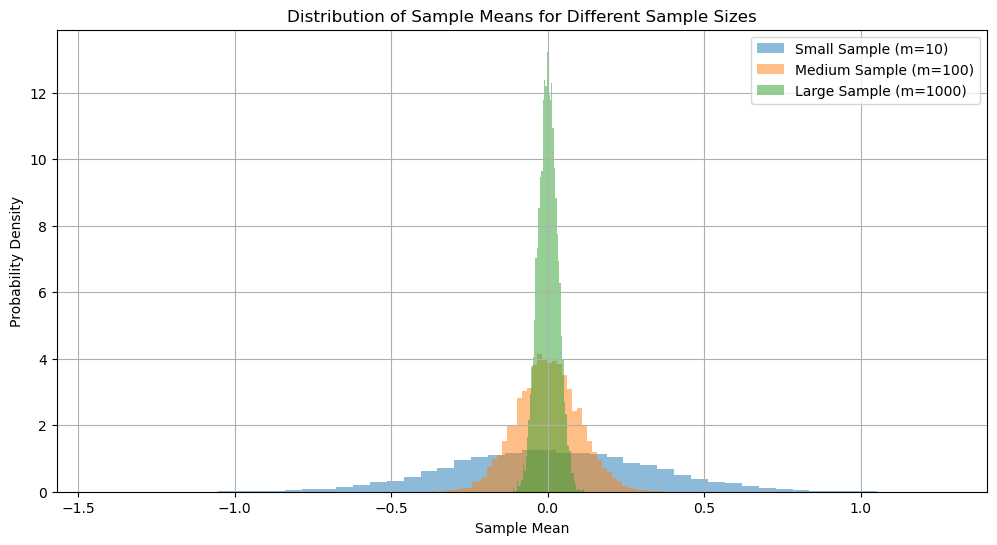

In [10]:
def sample_mean(m, n):
    sample_means = np.zeros(n)
    for i in range(n):
        samples = np.random.normal(0, 1, m)
        sample_mean = np.mean(samples)
        sample_means[i] = sample_mean
    return sample_means

# Define the values of m and n for different scenarios
m_values = [10, 100, 1000]
n = 10000

# Initialize a dictionary to store sample mean data
sample_mean_data = {}

# Generate sample means and store in the dictionary
for m in m_values:
    sample_means = sample_mean(m, n)
    sample_mean_data[m] = sample_means

# Plot histograms for each scenario
plt.figure(figsize=(12, 6))

for m, sample_means in sample_mean_data.items():
    plt.hist(sample_means, bins=50, density=True, alpha=0.5)

plt.xlabel('Sample Mean')
plt.ylabel('Probability Density')

# Customize legend labels
legend_labels = ['Small Sample (m=10)', 'Medium Sample (m=100)', 'Large Sample (m=1000)']
plt.legend(legend_labels)

plt.title('Distribution of Sample Means for Different Sample Sizes')
plt.grid(True)
plt.show()


Here we can see that the Central Limit Theorem is again proved as the sample means are grouped around 0, which is the approximate mean of the Standard Normal Distribution. As the mean obtained by the Standard Normal Distribution can be Negative, Positive and zero, hence the histograms are spread from -1 to 1. 

Now we need to plot the PDF of the sample means, and to do so, we have defined a class.

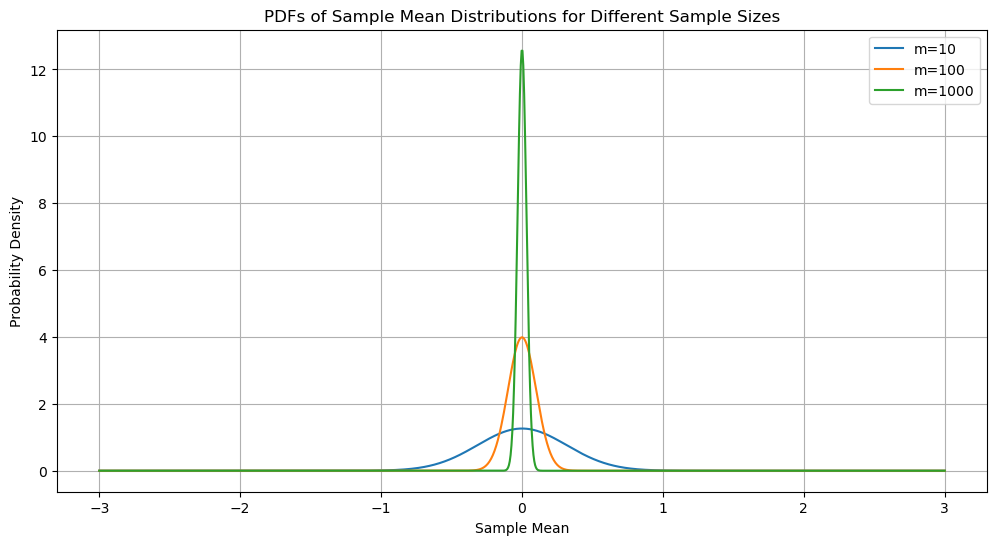

In [11]:
class sample_mean_distribution:
    def __init__(self, m):
        self.m = m  # Number of samples
        
    def sample_mean_pdf(self, x):
        # Calculate the PDF of the sample mean
        if self.m <= 0:
            return 0  # Handle division by zero
        
        # The PDF of the sample mean is a normal distribution with mean 0 and standard deviation 1/sqrt(m)
        mean = 0
        std_dev = 1 / np.sqrt(self.m)
        
        # Calculate the PDF value at x
        pdf = 1 / (std_dev * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
        return pdf

# Sample sizes for different scenarios
sample_sizes = [10, 100, 1000]

# Create objects for different sample sizes
sample_mean_distributions = [sample_mean_distribution(m) for m in sample_sizes]

# Values for x to calculate PDFs
x = np.linspace(-3, 3, 1000)

# Plot the PDFs for different sample sizes
plt.figure(figsize=(12, 6))

for dist, m in zip(sample_mean_distributions, sample_sizes):
    pdf_values = [dist.sample_mean_pdf(value) for value in x]
    plt.plot(x, pdf_values, label=f'm={m}')

plt.xlabel('Sample Mean')
plt.ylabel('Probability Density')
plt.legend()
plt.title('PDFs of Sample Mean Distributions for Different Sample Sizes')
plt.grid(True)
plt.show()


Here, We observe that,

For the Histograms:
When the size of "m" which is the number of samples increases, the histograms are grouped towards the center, which creates a Normal Distribution, proving the Central Limit Theorem.

Again as the sample size grows, the sample means gets saturated around the true mean.

For the PDFs:
Even in the case of PDF, when the size of number of samples increases, the curve has a peak in the center, which is the true mean of the sample, and this also shows the Normal Distribution proving the Central Limit Theorem.

For the Histograms with PDFs:
When plotted together, we can easily show the fitting of histograms in a Normal Distribution.

As we had large number of samples, we saw that the histograms are aligned with the PDFs, but if we had less samples then it would have been difficult for us to know what type of distributions does the histograms show.

Here, we have proved the Central Limit Theorem, that says that when the sample size increases, the distribution of the sample means is seen as a Normal Distribution.